In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [2]:
#!pip install -U imbalanced-learn

In [3]:
# import python module
#from python.xxxx import XXXX

In [4]:
# set random seed
import random
random.seed(335)

In [5]:
# magic word
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
# for better viz
import pprint
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('./data/OnlineRetail.csv')

In [8]:
df.head(4)

,Unnamed: 0,Description,Quantity,UnitPrice,CustomerID,Month,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Satisfaction
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,WHITE METAL LANTERN,6,3.39,17850.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### reference
-------------------

- [pandas cheat sheet](https://github.com/pandas-dev/pandas/tree/master/doc/cheatsheet)
- [numpy cheat sheet(data camp)](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet)
- [scikit-learn cheat sheet(data camp)](datacamp.com/community/blog/scikit-learn-cheat-sheet)

# modeling
---------------------
In this phase, various modeling techniques are selected and applied and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often necessary.

## select modeling techuique
----------

### task

As the first step in modeling, select the actual modeling technique that is to be used. Whereas you possibly already selected a tool in business understanding, this task refers to the specific modeling technique, e.g.,decision tree building with C4.5 or neural network generation with back propagation. If multiple techniques are applied, perform this task for each technique separately.

### output

#### modeling technique

Document the actual modeling technique that is to be used.

#### modeling assumptions

Many modeling techniques make specific assumptions on the data, e.g.,all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any such assumptions made.

### Answer: select modeling technique
#### modeling
- Logical regression
**Logistic regression** is used to predict probability of certain class (in our case class of most intresting products)
#### modeling assumptions
assumptions of Logistic regression:
- No missing values allowed
- all attributes are numbers
- not require a linear relationship between the dependent and independent variables.  
- Requier two classes (either 1 or 0)
- independent observations

## generate test design
------------------

### task

Before we actually build a model, we need to generate a procedure or mechanism to test the model's quality and validity. For example, in supervised data mining tasks such as classification, it is common to use error rates as quality measures for data mining models. Therefore, we typically separate the dataset into train and test set, build the model on the train set and estimate its quality on the separate test set.

### output

Describe the intended plan for training, testing and evaluating the models. A primary component of the plan is to decide how to divide the available dataset into training data, test data and validation datasets.


## Answer: generate test design
For traning and testing data will be splited into train and test sets (80% for training, 20% for testing).
As given problem is classification then ***accuracy, confusion matrix, recall and presision** as evaluation will be used.

## build model
----------

### task

Run the modeling tool on the prepared dataset to create one or more models.

### output

#### parameter settings 

With any modeling tool, there are often a large number of parameters that can be adjusted. List the parameters and their chosen value, along with the rationale for the choice of parameter settings. 

#### models 

These are the actual models produced by the modeling tool, not a report.

#### model description

describe the resultant model. Report on the interpretation of the models and document any difficulties encountered with their meanings.


## Answer: build model
### parameter settings
- [x] max_iter:100
- [ ] penalty: none,**l2**
- [ ] C: 0.5,**1**,2
- [x] solver: **sag** saga ‘newton-cg
### models
From Ligistic regression predictions of products with `satisfaction` >0.47 expected (marked as class 1)
### model description
As result given predictions can be used to predict relevant product for some country during given month. with query shown bellow

In [9]:

X,y = df.drop(['Satisfaction','Description','Unnamed: 0'],axis=1),df['Satisfaction']

In [10]:
# split data

## random split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

### regression
-------------

### classification
------------

#### imbalanced data

In [11]:
# imbalanced data: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
## random under sampler
#from imblearn.under_sampling import RandomUnderSampler
#sampler = RandomUnderSampler()

# random over sampler
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()

## SMOTE
#from imblearn.over_sampling import SMOTE
#sampler = SMOTE()

## TomekLinks
#from imblearn.under_sampling import TomekLinks
#sampler = TomekLinks()

## NearMiss
#from imblearn.under_sampling import NearMiss
#sampler = NearMiss()

## sampling
X_train, y_train = sampler.fit_resample(X_train, y_train)

#### modeling

In [12]:
#Ligistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100,solver='sag')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# SVM
#from sklearn.svm import SVC
#model = SVC(kernel='linear', random_state=None)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [ ]:
# LightGBM
#!pip install optuna
# import optuna.integration.lightgbm as lgb
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# params = {
#     "objective" : "multiclass",
#     "metric" : "multi_logloss",
#     "num_class" : len(y.unique())
# }
# model = lgb.train(params, lgb_train, valid_sets=lgb_eval)
# y_prob = model.predict(X_test, num_iteration=model.best_iteration)
# y_pred = np.argmax(y_prob, axis=1)

In [13]:
prediction = pd.concat([df.loc[y_test.index],pd.DataFrame(y_pred,columns=['pred'],index=y_test.index)],axis=1)
m1 = prediction['Germany']==1
m2 = prediction['Month']==3
m3 = prediction['pred']==1
mask = pd.concat([m1,m2,m3],axis=1).all(axis=1)
prediction[mask]['Description'].to_list()

['RETROSPOT PARTY BAG + STICKER SET',
 'SMALL RED RETROSPOT WINDMILL',
 'PANTRY PASTRY BRUSH',
 'WHITE SPOT BLUE CERAMIC DRAWER KNOB',
 'SET/6 FRUIT SALAD PAPER CUPS',
 '12 PENCILS TALL TUBE WOODLAND',
 'CERAMIC BOWL WITH LOVE HEART DESIGN',
 'PACK OF 6 SKULL PAPER PLATES',
 'PLASTERS IN TIN STRONGMAN',
 'SET OF 72 RETROSPOT PAPER  DOILIES',
 'PLASTERS IN TIN WOODLAND ANIMALS',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'PLASTERS IN TIN WOODLAND ANIMALS',
 'WHITE SPOT RED CERAMIC DRAWER KNOB',
 'WRAP RED APPLES ',
 'WRAP CIRCUS PARADE',
 'RED STRIPE CERAMIC DRAWER KNOB',
 'RED KITCHEN SCALES',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'DOLLY GIRL CHILDRENS EGG CUP',
 'SET/20 RED RETROSPOT PAPER NAPKINS ',
 'HAPPY STENCIL CRAFT',
 'BUNNY WOODEN PAINTED WITH BIRD ',
 'EASTER TIN CHICKS IN GARDEN',
 'TRAVEL CARD WALLET PANTRY',
 'PANTRY SCRUBBING BRUSH',
 'WALL TIDY RETROSPOT ',
 'BIG DOUGHNUT FRIDGE MAGNETS',
 'GIN AND TONIC MUG',
 'RED TOADSTOOL LED NIGHT LIGHT',
 'PACK OF 6 SKULL PAPER CUPS',
 'TRA

In [14]:
prediction.to_csv('./data/prediction.csv')

## Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_iter':[120,90], 'penalty': ['none','l2'], 'C': [0.5, 2], 'solver': ['sag', 'saga']}
#param_grid = {'max_iter':[120,90], 'solver': ['sag', 'saga']}
gs = GridSearchCV(LogisticRegression(), param_grid)
gs.fit(X_train, y_train)
print(gs.best_params_)
y_best_pred = gs.predict(X_test)

{'C': 0.5, 'max_iter': 90, 'penalty': 'l2', 'solver': 'sag'}


In [16]:
best_model = gs.best_estimator_

In [17]:
prediction1 = pd.concat([df.loc[y_test.index],pd.DataFrame(y_best_pred,columns=['pred'],index=y_test.index)],axis=1)
m1 = prediction1['Germany']==1
m2 = prediction1['Month']==3
m3 = prediction1['pred']==1
mask = pd.concat([m1,m2,m3],axis=1).all(axis=1)
print(prediction[mask]['Description'].to_list())
prediction1.to_csv('./data/prediction_best.csv')

['RETROSPOT PARTY BAG + STICKER SET', 'SMALL RED RETROSPOT WINDMILL', 'PANTRY PASTRY BRUSH', 'WHITE SPOT BLUE CERAMIC DRAWER KNOB', 'SET/6 FRUIT SALAD PAPER CUPS', '12 PENCILS TALL TUBE WOODLAND', 'CERAMIC BOWL WITH LOVE HEART DESIGN', 'PACK OF 6 SKULL PAPER PLATES', 'PLASTERS IN TIN STRONGMAN', 'SET OF 72 RETROSPOT PAPER  DOILIES', 'PLASTERS IN TIN WOODLAND ANIMALS', 'STRAWBERRY CERAMIC TRINKET BOX', 'PLASTERS IN TIN WOODLAND ANIMALS', 'WHITE SPOT RED CERAMIC DRAWER KNOB', 'WRAP RED APPLES ', 'WRAP CIRCUS PARADE', 'RED STRIPE CERAMIC DRAWER KNOB', 'RED KITCHEN SCALES', 'STRAWBERRY CERAMIC TRINKET BOX', 'DOLLY GIRL CHILDRENS EGG CUP', 'SET/20 RED RETROSPOT PAPER NAPKINS ', 'HAPPY STENCIL CRAFT', 'BUNNY WOODEN PAINTED WITH BIRD ', 'EASTER TIN CHICKS IN GARDEN', 'TRAVEL CARD WALLET PANTRY', 'PANTRY SCRUBBING BRUSH', 'WALL TIDY RETROSPOT ', 'BIG DOUGHNUT FRIDGE MAGNETS', 'GIN AND TONIC MUG', 'RED TOADSTOOL LED NIGHT LIGHT', 'PACK OF 6 SKULL PAPER CUPS', 'TRAVEL CARD WALLET RETRO PETALS', 

## assess model
-------------

### task

The data mining engineer interprets the models according to his domain knowledge, the data mining success criteria and the desired test design. This task interferes with the subsequent evaluation phase. Whereas the data mining engineer judges the success of the application of modeling and discovery techniques more technically, he contacts business analysts and domain experts later in order to discuss the data mining results in the business context. Moreover, this task only considers models whereas the evaluation phase also takes into account all other results that were produced in the course of the project. The data mining engineer tries to rank the models. He assesses the models according to the evaluation criteria. As far as possible he also takes into account business objectives and business success criteria. In most data mining projects, the data mining engineer applies a single technique more than once or generates data mining results with different alternative techniques. In this task, he also compares all results according to the evaluation criteria.

### output

#### model assessment

Summarize results of this task, list qualities of generated models (e.g.,in terms of accuracy) and rank their quality in relation to each other. 

#### revised parameter settings

According to the model assessment, revise parameter settings and tune them for the next run in the Build Model task. Iterate model building and assessment until you strongly believe that you found the best model(s). Document all such revisions and assessments.


## Model assessment
Performance of initial model (parameters shown above) was measured as:
- accuracy `79%`
- confusion matrix
\begin{bmatrix}
60991 & 12368\\
4328 & 2350 
\end{bmatrix}

- precision 0.1596684332110341
- recall 0.35190176699610665
## revised parameter settings
Following parameters will be tuned
- max_iter:[100,120,130,135]
- penalty: [none,l2]
- C: [0.5,1,2]
- solver: ['sag' 'saga', ‘newton-cg']

### regression
-----------------

### classification
----------------


In [18]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(str('{:.1g}'.format(accuracy * 100)) + '%')

8e+01%


In [19]:
print(str(int(accuracy*100))+'%')

79%


[[60908 12451]
 [ 4319  2359]]


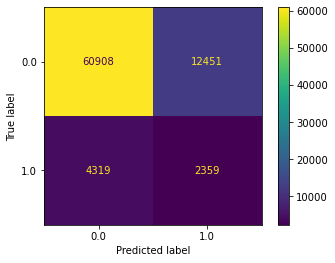

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model,X_test,y_true=y_test)
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score
print(f"precision {precision_score(y_test,y_pred)}")
print(f"recall {recall_score(y_test,y_pred)}")

precision 0.15928426738690074
recall 0.3532494758909853


Results for best model
79%
[[61132 12227]
 [ 4339  2339]]


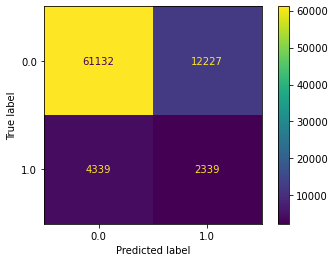

precision 0.16057943155293147
recall 0.3502545672356993


In [22]:
print("Results for best model")
accuracy = accuracy_score(y_test, y_best_pred)
print(str(int(accuracy*100))+'%')
cm = confusion_matrix(y_test, y_best_pred)
print(cm)
plot_confusion_matrix(best_model,X_test,y_true=y_test)
plt.show()
print(f"precision {precision_score(y_test,y_best_pred)}")
print(f"recall {recall_score(y_test,y_best_pred)}")

## note/questions
-------------

#### select modeling technique

#### generate test design

#### build model

#### assess model
